In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [55]:
dataset = pd.read_csv('customer_purchases.csv')

In [56]:
dataset.tail()

,Age,Salary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [109]:
X = dataset.iloc[:, [1,2]].values
print(X)
y = dataset.iloc[:, -1].values

[[ 19000      0]
 [ 20000      0]
 [ 43000      0]
 [ 57000      0]
 [ 76000      0]
 [ 58000      0]
 [ 84000      0]
 [150000      1]
 [ 33000      0]
 [ 65000      0]
 [ 80000      0]
 [ 52000      0]
 [ 86000      0]
 [ 18000      0]
 [ 82000      0]
 [ 80000      0]
 [ 25000      1]
 [ 26000      1]
 [ 28000      1]
 [ 29000      1]
 [ 22000      1]
 [ 49000      1]
 [ 41000      1]
 [ 22000      1]
 [ 23000      1]
 [ 20000      1]
 [ 28000      1]
 [ 30000      1]
 [ 43000      0]
 [ 18000      0]
 [ 74000      0]
 [137000      1]
 [ 16000      0]
 [ 44000      0]
 [ 90000      0]
 [ 27000      0]
 [ 28000      0]
 [ 49000      0]
 [ 72000      0]
 [ 31000      0]
 [ 17000      0]
 [ 51000      0]
 [108000      0]
 [ 15000      0]
 [ 84000      0]
 [ 20000      0]
 [ 79000      0]
 [ 54000      0]
 [135000      1]
 [ 89000      0]
 [ 32000      0]
 [ 44000      0]
 [ 83000      0]
 [ 23000      0]
 [ 58000      0]
 [ 55000      0]
 [ 48000      0]
 [ 79000      0]
 [ 18000      

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

In [110]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [114]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[68  0]
 [ 0 32]]


1.0

[[68  0]
 [ 0 32]]


<AxesSubplot:>

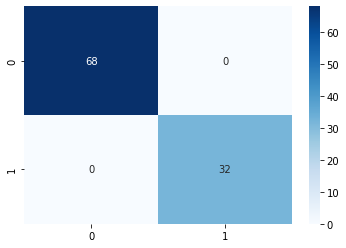

In [116]:
#Creating the Confusion matrix and heatmap
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, cmap="Blues")

In [117]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


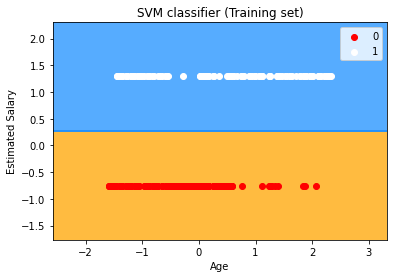

In [118]:
x_set, y_set = X_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)) 

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('orange', 'dodgerblue')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = [ListedColormap(('red', 'white'))(i)], label = j)  

plt.title('SVM classifier (Training set)')  

plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  

plt.legend()

plt.show()

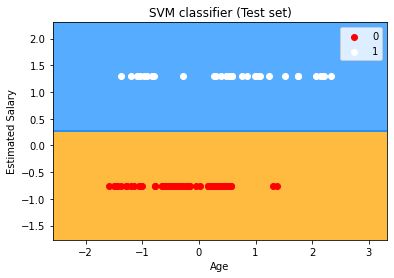

In [119]:
#Visulaizing the test set result  
x_set, y_set = X_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('orange','dodgerblue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=[ListedColormap(('red', 'white'))(i)], label=j)

plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

In [120]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_test, y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
#              cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend(loc = 'upper left', bbox_to_anchor = (1,1.03))
# plt.show()